# Final Project Report

* Class: DS 5100
* Student Name: Maheen Mubashar
* Student Net ID: mm3dc
* This URL: a URL to the notebook source of this document: 
https://github.com/mm3dc/MonteCarlo/blob/c4f0883d70997bb36f27f36148320bf44180cb30/DS51200_FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/mm3dc/MonteCarlo.git

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [7]:
'''
import pandas as pd
import numpy as np

class Dice:
    
    """
    A class representing a die of N sides or 'faces' and W weights that can be rolled to select a face. By default 
    all faces have equal weight of 1.0, but can be changed after the object is created. Each side of a die contains a
    unique symbol. Symbols may be alphabetic or numeric. The die has one behavior, which is to be rolled one or more times.
    
    ATTRIBUTES:
        faces(np.ndarray): The faces of the die passed as a NumPy array. Could be numeric or strings.
        
        weights (np.ndarray): The weights for each face, defaults to 1.0 for all faces. Can be changed later.
        
        _my_die (pd.DataFrame): A private pandas DataFrame that contains faces and their weights.
        
    METHODS:
        __init__(self, face_array): Initializes the Dice object with faces and sets all weights to 1.0.
        
        change_weight(side, new_weight): Changes the weight of a given face.
        
        roll_the_die(rolls = 1): Rolls the die a specific number of times, and returns a list of outcomes.
            
        die_current_state(): Returns a copy of the current state of the die.
    """
    

    def __init__ (self, face_array):
        """
        PURPOSE: Initiliaze the Dice object with faces and set all weights to 1.0. 
        Wieghts can be changed after initialization. 
        
        INPUTS: 
            face_array(np.ndarray): The faces of the die. Should be an numpy array of distinct values.
            
        RAISES:
            TypeError: If face_array is not a numpy array.
            ValueError: If face_array does not have distinct values.
        """
        
        #Check that face_array is a numpy array 
        if type(face_array) is not np.ndarray:                       
            raise TypeError ("Argument should be a numpy array")    
        
        
        #Check that all values in the array are distinct 
        if len(np.unique(face_array)) != len(face_array):         
            raise ValueError ("Values should be distinct")
        
        self.faces = face_array
        self.weights = np.ones(len(face_array))     #Set default weight of 1.0 for each face
        
        #Save faces and weights in a private data frame with face as index
        self._my_die = pd.DataFrame({                   
        'faces': self.faces,
        'weights': self.weights
    },
        index = self.faces)
        
    def change_weight(self, side, new_weight):
        """
        PURPOSE: Change the weight of a given face of the die
        
        INPUTS:
            side (str or int): The face of the die to change the wieght of.
            new_weight (int or float): The new weight for the given side.
            
        RAISES:
            IndexError: If the face passed is not in the die array.
            TypeError: If new_weight is not an int or float.
        """
        
        # Check that side passed is in the die array
        if side not in self.faces:
            raise IndexError("Face passed is not a valid value")
        
        type_of_weight = [int, float]     #acceptable types of weights
        
        # Check that the weight is numeric 
        if type(new_weight) not in type_of_weight: 
            try:
                new_weight = float(new_weight)               #Check if castable as numeric
            except: 
                raise TypeError("New weight should be of type integer or float")
        
        
        #Change the weight of for the passed side to the new weight
        self._my_die.loc[side, 'weights'] = new_weight
            
            
    def roll_the_die(self, rolls = 1):
        """
        PURPOSE: Roll the die and return a Python list of outcomes.
        
        INPUTS:
            rolls (int): The number of times to roll the die. Defaults to 1.
        
        OUTPUTS: 
            List: A list of rolled faces (outcomes).
        """
        
        results = []       #create list of results
        
        # Roll the die the specified number of times
        
        for i in range(rolls):
            result = self._my_die.faces.sample(weights = self._my_die.weights, replace = True).values[0]
            results.append(result)
        
        return results                           # what does he mean do not interanlly store the results, don't use self?
    
    
    
    def die_current_state(self):
        """
        PURPOSE: Returns a copy of the private die data frame.
        
        OUTPUTS:
            pd.DataFrame: A DataFrame of the die's faces and weights.
        """
        
        # Return a copy of the private die data frame
        return self._my_die.copy()
'''
'''
import pandas as pd
import numpy as np
from dieclass import Dice

class Game:
    
    """
    Class representing a game consisting of rolling one or more similar dice (Die objects) one or more times. 
    
    Each game is initiated with a Python list of one or more dice. Similar dice mean that each die in a given game 
    has the same number of sides and associated faces, but each die object may have its onw weights. Game objects have 
    behavior to roll all the dice a given number of times. Game objects only keep the results of their most recent play.
    
    ATTRIBUTES:
        list_of_dice(List): A list of one or more Dice objects that are used in the game. All dice must have the has the same number of sides and associated faces.
        
        _play_results(pd.DataFrame): A private DataFrame that stores the results of the most recent play in "wide" format.
    
    METHODS:
        __int__ (self, dice_list): Initializes a game with a list of Die objects.
        
        play(self,rolls): Rolls all the dice the specified number of times and saves the result of the play to a private data frame in "wide" format.
        
        show_results(self, form = 'wide'): Returns a copy of the private data frame of results of the most recent play in either "wide" or "narrow" format.

    
    """
    
    def __init__(self, dice_list):
        """
        PURPOSE: Takes a single parameter, a list of already instantiated similar dice and initializes a Game object with it.
        
        INPUTS:
            dice_list(List): A list of already instantiated similar dice objects.
            
        RAISES: 
            TypeError: If any element in the dice_list is not a Die object.
            ValueError: If any dice in the list have different faces.
        """
        
        #Check that all elements in dice_list are of class Dice
        for d in dice_list:
            if (type(d) is not Dice):
                raise TypeError ("All elements in the dice list must be objects of the Die Class")
        
        
        
        faces = [(x.faces) for x in dice_list]      #get faces of all the die in the dice_list
       
        # Check that all dice have the same faces
        for die in dice_list[1:]:                    #start from the second die
            if not np.array_equal(die.faces, dice_list[0].faces):             #comparing to the first die #*  
                raise ValueError("All dice must have the same faces.")
           
        
        #* from: https://stackoverflow.com/questions/10580676/comparing-two-numpy-arrays-for-equality-element-wise
        
        
        #Initialize the list of dice using the given parameter
        self.list_of_dice = dice_list
    
    
    def play(self,rolls):
        """
        PURPOSE: Simulates playing the game by rolling all dice the specified number of times. Saves results of 
        the play in a private DataFrame ("_play_results") in wide format.
        
        INPUTS:
            rolls (int): The number of times to roll the  dice.
            
        
        """
        
        
        outcomes = {}
        
        
        # Rolls each die and store the results
        for i in range(len(self.list_of_dice)):
            die = self.list_of_dice[i]
            outcomes[i] = die.roll_the_die(rolls)

        
        # Save the results of the play to a private data frame in wide format by defualt
        self._play_results = pd.DataFrame(outcomes)
        
        self._play_results.index = [i+1 for i in range(len(self._play_results.index))]
        
        self._play_results.columns = [i+1 for i in range(len(self._play_results.columns))]
        
        self._play_results.index.name = 'rolls'
        
        self._play_results.columns.name = 'die'
    
    
    def show_results(self, form = "wide"):
        """
        PURPOSE: Returns a copy of the private play data frame to show the user the results of the most recent play in either "wide" or "narrow" format.
        
        INPUTS: 
            form (str): The format ("Wide" or "Narrow") to return the data frame in. Defaults to wide. 
        
            
        OUTPUTS:
            pd.DataFrame: A DataFrame of the results of the most recent play in the requested format.
            
            
        RAISES:
            ValueError: If the user passes an invalid option for form other than "narrow" or "wide".
            
        """
        
        # Check if play_results has been initialized by checking for _play_results      
        if not hasattr(self, '_play_results'): 
            raise Error("The play method must be called before showing results.")
            
            #from https://stackoverflow.com/questions/610883/how-to-check-if-an-object-has-an-attribute
        
        
        if form == "wide":
            return self._play_results.copy()                    #Return a copy of the private play data frame in wide format
        elif form == "narrow": 
            #Convert the data frame to narrow format
            narrow_df = self._play_results.stack().reset_index().set_index(['rolls', 'die'])     
            narrow_df.columns = ['outcomes']
            return narrow_df.copy()                             #Returns a copy of the private play data frame in narrow format                  
        else:
            raise ValueError("Invalid format. Please choose either 'wide' or 'narrow'.")
                                                                    
'''
'''
import pandas as pd
import numpy as np
import random

from dieclass import Dice

from gameclass import Game


class Analyzer:
    """
    An Analyzer object takes the results of a single game and computes various descriptive statistical properties about it.
    
    ATTRIBUTES:
        game(Game): A game object based on the given parameter.        
 
    METHODS:
        __init__ (self, game_object): Initializes the given game object.
        
        jackpot (self): Computes how many times the game resulted in a jackpot. Returns an integer for the number of jackpots.
        
        face_count (self): Computes how many times a given face is rolled in each event. Returns a data frame of results.
        
        combo_count (self): Computes the distinct combinations of faces rolled, along with their counts. Returns a data frame of results.
        
        permutation_count (self): Computes the distinct permutations of faces rolled, along with their counts. Returns a data frame of results.
    
    """
    
    def __init__(self, game_object):
        """
        PURPOSE: Takes a game object as its input parameter and initializes it.
        
        INPUTS: 
            game_object(Game): A game object.
        
        RAISES:
            ValueError: If the passed value is not a Game object.
        
        """
        if type(game_object) is not Game:
            raise ValueError ("Passed object is not a game object")
        
        self.game = game_object
        
        
    def jackpot(self):
        """
        PURPOSE:
            Computes how many times the game resulted in a jackpot. A jackpot is a result in which all faces are the same, e.g. all ones for a six-sided die.


        OUTPUTS:
            Int: An integer for the number of jackpots.
           
            
        """
        
        if not hasattr(self.game, '_play_results') or self.game._play_results is None:
            raise ValueError("The game has not been played yet. Please call the play method first.")

        
        
        jackpot = 0 
        
        # Iterate through each roll and check if the faces are all the same, indicating a jackpot       
        for index, row in self.game._play_results.iterrows():                       #* 
            if (len(np.unique(row.values)) == 1):      
                jackpot +=1
        
        return jackpot       
    
    #* from https://stackoverflow.com/questions/16476924/how-can-i-iterate-over-rows-in-a-pandas-dataframe
    
    def face_count(self):
        """
        PURPOSE:
            Computes how many times a given face is rolled in each event. 
        
        
        OUTPUTS: 
          pd.DataFrame: A Data Frame of the face counts. The data frame has an index of the roll number, face values as columns, and count values in the cells.   
        
        """
       
    
        if not hasattr(self.game, '_play_results') or self.game._play_results is None:
            raise ValueError("The game has not been played yet. Please call the play method first.")

        
        counts = self.game._play_results.stack().groupby('rolls').value_counts().unstack()
        counts = counts.fillna(0)
        counts.columns.name = "face values"
        face_num = len(self.game.list_of_dice[0].faces)            #since game objects require all dice have the same number of faces                                             
        counts = counts.reindex(columns = range(1,int(face_num)+1), fill_value = 0.0)
        return counts
        
   
    def combo_count(self): 
        """
        PURPOSE:
            Computes the distinct combinations of faces rolled, along with their counts. Combinations are order-independent and may contain repetitions.
            
        
        OUTPUTS:
            pd.DataFrame: A data frame of the count of order-independent combinations. 
            
        
        """
            
            
        if not hasattr(self.game, '_play_results') or self.game._play_results is None:
            raise ValueError("The game has not been played yet. Please call the play method first.")

        
        
        combos = [*self.game._play_results.itertuples(index = False, name = None)]   #*
        combos = [tuple(sorted(i)) for i in combos]                                            #turning all combos into tuples 
        combo_df = pd.DataFrame(combos)
        combo_df.columns = combo_df.columns +1
        combo_df = combo_df.groupby(combo_df.columns.tolist(), as_index = False).size()
        combo_df.rename(columns={'size': 'Count'}, inplace=True)
        combo_df = combo_df.set_index(combo_df.columns[:-1].tolist())
        
        
        return combo_df

      #* from https://stackoverflow.com/questions/55976283/how-to-get-data-from-rows-into-tuples

    def permutation_count(self):
        """
        PURPOSE:
            Computes the distinct permutations of faces rolled, along with their counts. Permutations are order-dependent and may contain repetitions.


        OUTPUTS:
            pd.DataFrame: A data frame of counts of permutations.
        
        """
        
        if not hasattr(self.game, '_play_results') or self.game._play_results is None:
            raise ValueError("The game has not been played yet. Please call the play method first.")

        
        perm_tuples = [*self.game._play_results.itertuples(index=False, name=None)]                    #turning combos into tuples 
        perm_counts_df = pd.DataFrame(perm_tuples)
        perm_counts_df.columns = perm_counts_df.columns +1
        perm_counts_df = perm_counts_df.groupby(perm_counts_df.columns.tolist(), as_index = False).size()
        perm_counts_df.rename(columns={'size': 'Count'}, inplace=True)
        perm_counts_df = perm_counts_df.set_index(perm_counts_df.columns[:-1].tolist())
        
        return perm_counts_df
        
'''

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [2]:
'''
import unittest
import pandas as pd
import numpy as np

from dieclass import Dice

from gameclass import Game

from analyzerclass import Analyzer

class DieGameTestSuite(unittest.TestCase):
    
    
    def test_1_die_init(self): 
        #create a die and test that it has been correctly created 
        faces = np.array([1,2,3,4])
        die1 = Dice(faces)
        die1_faces = die1._my_die.faces
        self.assertTrue((die1_faces == faces).all())
    
    def test_2_change_weight(self):
        # create a die and change the weight of one of its faces. Test if the weight has been changed
        die2 = Dice(np.array([1,2,3,4,5,6]))
        side = 6
        new_weight = 3.0
        die2.change_weight(side, new_weight)
        self.assertEqual(die2._my_die.loc[side,'weights'], new_weight)
    
    def test_3_roll_the_die(self):
        # create a die and roll it. Test if it is rolled the correct amount of times and if the result is a list
        die3 = Dice(np.array([1,2,3,4,5,6]))
        rolls = 4
        results = die3.roll_the_die(rolls)
        self.assertEqual(len(results),rolls)
        self.assertEqual(type(results),list)          
    
    def test_4_die_current_state(self):                                              
        # create a die and test whether its current state matches the initialized state
        die4 = Dice(np.array([1,2,3,4,5,6]))
        current_state = die4.die_current_state()
        initialized_state = die4._my_die                         
        self.assertTrue(current_state.equals(initialized_state))
     
    def test_5_game_init(self):
        #create a game object and test that it was correctly initialized
        faces = np.array([1,2,3,4,5,6])
        d1 = Dice(faces)
        d2 = Dice(faces)
        d3 = Dice(faces)
        game1 = Game([d1,d2,d3])
        self.assertTrue((game1.list_of_dice[0].faces == faces).all())
           
    def test_6_play(self):  
        # create a game object and play. Test if the results are correctly stored
        d1 = Dice(np.array([1,2,3,4,5,6]))
        d2 = Dice(np.array([1,2,3,4,5,6]))
        d3 = Dice(np.array([1,2,3,4,5,6]))
        game2 = Game([d1,d2,d3])
        dice_num = len(game2.list_of_dice)
        rolls = 4
        game2.play(rolls)
        self.assertEqual(game2._play_results.shape, (rolls, dice_num))
        
    def test_7_show_results(self):
        # create a game object and play. Test if the show results data frame is correctly formatted for narrow form
        d1 = Dice(np.array([1,2,3,4,5,6]))
        d2 = Dice(np.array([1,2,3,4,5,6]))
        d3 = Dice(np.array([1,2,3,4,5,6]))
        game3 = Game([d1,d2,d3])
        rolls = 4
        game3.play(rolls)
        narrow_results = game3.show_results('narrow')
        narrow_form = (rolls*len(game3.list_of_dice),1)
        self.assertEqual(narrow_results.shape, narrow_form)       #check that the returned results in narrow form has the expected shape
        
     
    def test_8_analyzer_init(self):
        #create an analyzer object and test whether the raise statement is raising the correct exception
        d1 = Dice(np.array([1,2,3,4,5,6]))
        d2 = Dice(np.array([1,2,3,4,5,6]))
        d3 = Dice(np.array([1,2,3,4,5,6]))
        d4 = Dice(np.array([1,2,3,4,5,6]))
        game4 = Game([d1,d2,d3,d4])
        #analyzer1 = Analyzer(d4)
        self.assertRaises(ValueError, Analyzer, d4)
        
    def test_9_jackpot(self):
        #create an analyzer object. Test if the number of jackpots meet the expected number of jackpots
        d1 = Dice(np.array([1,2,3,4,5,6]))
        d2 = Dice(np.array([1,2,3,4,5,6]))
        d3 = Dice(np.array([1,2,3,4,5,6]))
        d4 = Dice(np.array([1,2,3,4,5,6]))
        game5 = Game([d1,d2,d3,d4])
        rolls = 3
        game5.play(rolls)
        game5._play_results.iloc[1] = [2,2,2,2]          #force a jackpot
        analyzer2 = Analyzer(game5)
        num_jackpot = analyzer2.jackpot() 
        self.assertTrue(num_jackpot >=1)     #test that at least one jackpot is counted -- the forced one
    
    def test_10_face_count(self):
        # create an analyzer object. Test that the face_count returns a data frame of correct shape
        d1 = Dice(np.array([1,2,3,4,5,6]))
        d2 = Dice(np.array([1,2,3,4,5,6]))
        d3 = Dice(np.array([1,2,3,4,5,6]))
        d4 = Dice(np.array([1,2,3,4,5,6]))
        game6 = Game([d1,d2,d3,d4])
        rolls = 3
        game6.play(rolls)
        face_num = len(d1.faces)
        analyzer3 = Analyzer(game6)
        face_counts = analyzer3.face_count() 
        self.assertEqual(type(face_counts), pd.DataFrame)
        self.assertEqual(face_counts.shape, (rolls,face_num))      
        
    def test_11_combo_count(self):
        # create an analyzer object. Test that the combination counts results are returned in a data frame with MultiIndex.
        d1 = Dice(np.array([1,2,3,4,5,6]))
        d2 = Dice(np.array([1,2,3,4,5,6]))
        d3 = Dice(np.array([1,2,3,4,5,6]))
        d4 = Dice(np.array([1,2,3,4,5,6]))
        game7 = Game([d1,d2,d3,d4])
        rolls = 3
        game7.play(rolls)
        analyzer4 = Analyzer(game7)
        combo_counts = analyzer4.combo_count()
        self.assertTrue(type(combo_counts) == pd.DataFrame)
        self.assertTrue(isinstance(combo_counts.index, pd.MultiIndex))                  
        
        #from: https://stackoverflow.com/questions/21081042/detect-whether-a-dataframe-has-a-multiindex
        
    def test_12_permutation_count(self):
        # create an analyzer object. Test that the permutation count results are returned in a data frame with MultiIndex.
        d1 = Dice(np.array([1,2,3,4,5,6]))
        d2 = Dice(np.array([1,2,3,4,5,6]))
        d3 = Dice(np.array([1,2,3,4,5,6]))
        d4 = Dice(np.array([1,2,3,4,5,6]))
        game8 = Game([d1,d2,d3,d4])
        rolls = 3
        game8.play(rolls)
        analyzer5 = Analyzer(game8)
        perm_count = analyzer5.permutation_count()
        self.assertTrue(type(perm_count) == pd.DataFrame)
        self.assertTrue(isinstance(perm_count.index, pd.MultiIndex))

        
        
        
if __name__ == '__main__':
    
    unittest.main(verbosity=3)

'''

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [13]:
import montecarlo.montecarlo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [3]:
help(montecarlo.montecarlo)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Dice
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game_object)
     |  
     |  An Analyzer object takes the results of a single game and computes various descriptive statistical properties about it.
     |  
     |  ATTRIBUTES:
     |      game(Game): A game object based on the given parameter.        
     |  
     |  METHODS:
     |      __init__ (self, game_object): Initializes the given game object.
     |      
     |      jackpot (self): Computes how many times the game resulted in a jackpot. Returns an integer for the number of jackpots.
     |      
     |      face_count (self): Computes how many times a given face is rolled in each event. Returns a data frame of results.
     |      
     |      combo_count (self): Computes the distinct combinations of faces rolled, along with their counts. Returns a data frame of

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL:https://github.com/mm3dc/MonteCarlo/blob/4e61b9aa1f57ddd32763adbcfa03245e8e097e0a/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

In [5]:
! pip install .

Defaulting to user installation because normal site-packages is not writeable
Processing /sfs/gpfs/tardis/home/mm3dc/MonteCarlo
  Preparing metadata (setup.py) ... done
  Created wheel for MonteCarlo: filename=MonteCarlo-0.1-py3-none-any.whl size=6326 sha256=d65899b1167571a4dd11177fd5c8c01dbceb6b5d4ac0045a87d5b56ffdf59ebe
  Stored in directory: /tmp/pip-ephem-wheel-cache-cd5w2_ed/wheels/7e/e5/42/93c0504563954b8ca89b6f90f737420af0746ab96ce653a6bc
Successfully built MonteCarlo
  Attempting uninstall: MonteCarlo
    Found existing installation: MonteCarlo 0.1
    Uninstalling MonteCarlo-0.1:
      Successfully uninstalled MonteCarlo-0.1


# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [7]:
import pandas as pd
import numpy as np

In [20]:
from montecarlo import Dice, Game, Analyzer

In [88]:
H_T = np.array(['H','T'])
dice_fair = Dice(H_T)

In [89]:
dice_fair._my_die

,faces,weights
H,H,1.0
T,T,1.0


In [90]:
dice_unfair = Dice(H_T)
dice_unfair.change_weight('T', 5)

In [91]:
dice_unfair._my_die

,faces,weights
H,H,1.0
T,T,5.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [24]:
game_fair = Game([dice_fair, dice_fair])
game_fair.play(1000)

In [25]:
game_fair._play_results

die,1,2
rolls,,
1,T,H
2,H,T
3,H,H
4,T,T
5,H,H
...,...,...
996,T,T
997,T,H
998,H,H


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [26]:
game_unfair = Game([dice_fair, dice_unfair, dice_unfair])
game_unfair.play(1000)

In [27]:
game_unfair._play_results

die,1,2,3
rolls,,,
1,H,T,T
2,H,T,T
3,T,T,T
4,H,T,T
5,H,T,H
...,...,...,...
996,T,T,H
997,T,T,T
998,H,T,T


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [28]:
analyzer_fair = Analyzer(game_fair)
analyzer_fair.jackpot()

470

In [29]:
analyzer_unfair = Analyzer(game_unfair)
analyzer_unfair.jackpot()

359

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [30]:
rolls = 1000

In [31]:
analyzer_fair_relative_frequency = analyzer_fair.jackpot()/rolls
analyzer_fair_relative_frequency

0.47

In [32]:
analyzer_unfair_relative_frequency = analyzer_unfair.jackpot()/rolls
analyzer_unfair_relative_frequency

0.359

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

In [33]:
from matplotlib.pyplot import plot

In [34]:
frequencies = pd.DataFrame({'fair die': [analyzer_fair_relative_frequency], 'unfair die': [analyzer_unfair_relative_frequency]})

<Axes: >

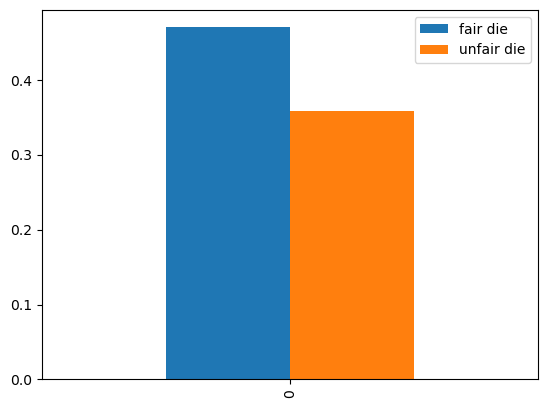

In [35]:
frequencies.plot.bar()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [36]:
die_faces = np.array([1,2,3,4,5,6])
die_1 = Dice(die_faces)
die_2 = Dice(die_faces)
die_3 = Dice(die_faces)

In [37]:
die_1._my_die

,faces,weights
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
5,5,1.0
6,6,1.0


In [38]:
die_2._my_die

,faces,weights
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
5,5,1.0
6,6,1.0


In [39]:
die_3._my_die

,faces,weights
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
5,5,1.0
6,6,1.0


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [40]:
die_2.change_weight(6,5)
die_2._my_die

,faces,weights
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
5,5,1.0
6,6,5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [41]:
die_1.change_weight(1,5)
die_1._my_die

,faces,weights
1,1,5.0
2,2,1.0
3,3,1.0
4,4,1.0
5,5,1.0
6,6,1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [43]:
die_3._my_die     #die_3 is fair

,faces,weights
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
5,5,1.0
6,6,1.0


In [42]:
game_5_fair = Game([die_3, die_3, die_3, die_3, die_3])      
game_5_fair.play(10000)

In [44]:
game_5_fair._play_results

die,1,2,3,4,5
rolls,,,,,
1,5,2,6,4,4
2,1,5,6,2,4
3,3,6,3,2,6
4,3,2,6,1,6
5,2,3,4,2,5
...,...,...,...,...,...
9996,2,3,4,4,4
9997,6,5,4,6,2
9998,1,6,5,3,3


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [45]:
game_unfair_2 = Game([die_2, die_1, die_3, die_3, die_3])
game_unfair_2.play(10000)

In [46]:
game_unfair_2._play_results

die,1,2,3,4,5
rolls,,,,,
1,4,6,3,3,2
2,1,6,3,1,5
3,6,3,6,4,5
4,6,4,3,3,3
5,2,1,3,6,4
...,...,...,...,...,...
9996,5,3,1,1,5
9997,6,3,1,6,5
9998,6,1,5,5,5


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [47]:
analyzer_5_fair = Analyzer(game_5_fair)
fair_jackpot = analyzer_5_fair.jackpot()
fair_jackpot

5

In [48]:
analyzer_unfair_2 = Analyzer(game_unfair_2)
unfair_jackpot = analyzer_unfair_2.jackpot()
unfair_jackpot

6

In [51]:
from matplotlib.pyplot import plot

In [52]:
jackpots = pd.DataFrame({'fair game': [fair_jackpot], 'unfair game': [unfair_jackpot]})

<Axes: >

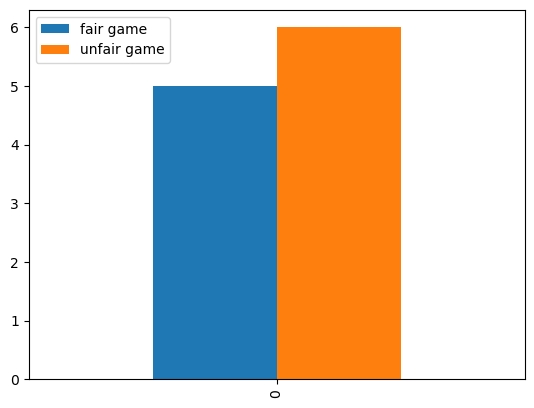

In [53]:
jackpots.plot.bar()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [55]:
english_letters = {}

with open('english_letters.txt', 'r') as infile:
    for line in infile:
        row = line.strip().split()
        alphabet = row[0]
        frequency = int(row[1])
        english_letters[alphabet] = frequency

english_letters

{'E': 529117365,
 'T': 390965105,
 'A': 374061888,
 'O': 326627740,
 'I': 320410057,
 'N': 313720540,
 'S': 294300210,
 'R': 277000841,
 'H': 216768975,
 'L': 183996130,
 'D': 169330528,
 'C': 138416451,
 'U': 117295780,
 'M': 110504544,
 'F': 95422055,
 'G': 91258980,
 'P': 90376747,
 'W': 79843664,
 'Y': 75294515,
 'B': 70195826,
 'V': 46337161,
 'K': 35373464,
 'J': 9613410,
 'X': 8369915,
 'Z': 4975847,
 'Q': 4550166}

In [93]:
faces = list(map(chr, range(ord('A'), ord('Z') + 1)))             
faces

#from https://stackoverflow.com/questions/16060899/alphabet-range-in-python

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [94]:
alphabet_die = Dice(np.array(faces))

In [95]:
alphabet_die._my_die

,faces,weights
A,A,1.0
B,B,1.0
C,C,1.0
D,D,1.0
E,E,1.0
F,F,1.0
G,G,1.0
H,H,1.0
I,I,1.0
J,J,1.0


In [96]:
for face in faces:
    weight = english_letters.get(face,0) 
    alphabet_die.change_weight(face, weight)

In [97]:
alphabet_die._my_die

,faces,weights
A,A,374061888.0
B,B,70195826.0
C,C,138416451.0
D,D,169330528.0
E,E,529117365.0
F,F,95422055.0
G,G,91258980.0
H,H,216768975.0
I,I,320410057.0
J,J,9613410.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [98]:
alphabet_game = Game([alphabet_die, alphabet_die, alphabet_die, alphabet_die])

In [99]:
alphabet_game.play(1000)

In [100]:
alphabet_game._play_results

die,1,2,3,4
rolls,,,,
1,T,A,A,A
2,U,D,W,G
3,O,H,A,N
4,A,P,T,S
5,O,T,E,R
...,...,...,...,...
996,S,F,N,E
997,A,T,D,I
998,A,N,D,D


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [63]:
alphabet_analyzer = Analyzer(alphabet_game)

In [64]:
permutations = alphabet_analyzer.permutation_count()
permutations.head(10)

Count
1 2 3 4       
A A I E      1
    K R      1
    O S      1
    R A      1
    S T      1
  B T R      1
  C A D      1
    E R      1
    N I      1
  D E C      1

In [65]:
perm_tuples = [tuple(i) for i in permutations.index]         #convert the permutation combinations into tuples
perm_tuples[:10]

[('A', 'A', 'I', 'E'),
 ('A', 'A', 'K', 'R'),
 ('A', 'A', 'O', 'S'),
 ('A', 'A', 'R', 'A'),
 ('A', 'A', 'S', 'T'),
 ('A', 'B', 'T', 'R'),
 ('A', 'C', 'A', 'D'),
 ('A', 'C', 'E', 'R'),
 ('A', 'C', 'N', 'I'),
 ('A', 'D', 'E', 'C')]

In [66]:
perm_list = []                    
for letter in perm_tuples:
    perm_list.append(''.join(letter))

perm_list[:10]

['AAIE',
 'AAKR',
 'AAOS',
 'AARA',
 'AAST',
 'ABTR',
 'ACAD',
 'ACER',
 'ACNI',
 'ADEC']

In [67]:
scrabble_file = open('scrabble_words.txt', 'r')
scrabble_words = [line for line in scrabble_file.read().strip().split()]
scrabble_words[:10]

['AA',
 'AAH',
 'AAHED',
 'AAHING',
 'AAHS',
 'AAL',
 'AALII',
 'AALIIS',
 'AALS',
 'AARDVARK']

In [70]:
actual_words = []
for word in perm_list:
    if word in scrabble_words:
        actual_words.append(word)

In [72]:
actual_words[:10]

['ACER',
 'AERO',
 'AIDE',
 'ASEA',
 'BUDO',
 'COSH',
 'ECCO',
 'EISH',
 'ETAS',
 'GENU']

In [101]:
count = len(permutations) - len(actual_words)
print('Difference between permutations and vocabulary is:',count)

Difference between permutations and vocabulary is: 942


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [77]:
alphabet_game_5 = Game([alphabet_die, alphabet_die, alphabet_die , alphabet_die, alphabet_die])
alphabet_game_5.play(1000)

In [78]:
alphabet_game_5._play_results

die,1,2,3,4,5
rolls,,,,,
1,P,F,E,A,E
2,L,O,E,T,T
3,D,N,S,Y,H
4,C,A,T,I,L
5,R,D,C,O,I
...,...,...,...,...,...
996,S,E,O,D,O
997,R,H,C,E,C
998,H,S,O,H,R


In [79]:
alphabet_analyzer_5 = Analyzer(alphabet_game_5)

In [80]:
permutations_5 = alphabet_analyzer_5.permutation_count()
permutations_5.head(10)

Count
1 2 3 4 5       
A A A P M      1
    B B R      1
      S O      1
    C I N      1
    D E L      1
      I E      1
    E F E      1
    G R M      1
    I H T      1
      T A      1

In [81]:
perm_tuples_5 = [tuple(i) for i in permutations_5.index]         
perm_tuples_5[:10]

[('A', 'A', 'A', 'P', 'M'),
 ('A', 'A', 'B', 'B', 'R'),
 ('A', 'A', 'B', 'S', 'O'),
 ('A', 'A', 'C', 'I', 'N'),
 ('A', 'A', 'D', 'E', 'L'),
 ('A', 'A', 'D', 'I', 'E'),
 ('A', 'A', 'E', 'F', 'E'),
 ('A', 'A', 'G', 'R', 'M'),
 ('A', 'A', 'I', 'H', 'T'),
 ('A', 'A', 'I', 'T', 'A')]

In [82]:
perm_list_5 = []
for letter in perm_tuples_5:
    perm_list_5.append(''.join(letter))
    
perm_list_5[:10]

['AAAPM',
 'AABBR',
 'AABSO',
 'AACIN',
 'AADEL',
 'AADIE',
 'AAEFE',
 'AAGRM',
 'AAIHT',
 'AAITA']

In [83]:
scrabble_file = open('scrabble_words.txt', 'r')
scrabble_words = [line for line in scrabble_file.read().strip().split()]
scrabble_words[:10]

['AA',
 'AAH',
 'AAHED',
 'AAHING',
 'AAHS',
 'AAL',
 'AALII',
 'AALIIS',
 'AALS',
 'AARDVARK']

In [84]:
actual_words_5 = []
for word in perm_list_5:
    if word in scrabble_words:
        actual_words_5.append(word)

In [85]:
actual_words_5[:10]

['BLIVE', 'BOTEL', 'EROSE', 'GENES', 'HADAL', 'ORIEL', 'STEAN', 'WESTS']

In [102]:
print(f'This produces {len(actual_words_5)} actual words')

This produces 8 actual words


In [108]:
print(f'The model in this Task 4 produces {len(actual_words)} actual words')

The model in this Task 4 produces 51 actual words


In [109]:
if len(actual_words) > len(actual_words_5):
    print(f'The game in Task 2 & 3  with 4 dices produces {len(actual_words) - len(actual_words_5)} more words than the game in this Task 4 with 5 dices')
else:
    print(f'The game in this Task 4 with 5 dices produces {len(actual_words_5) - len(actual_words)} more words than the game in Task 2 & 3 with 4 dices')
        
                

The game in Task 2 & 3  with 4 dices produces 43 more words than the game in this Task 4 with 5 dices
